In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_path='../input/covid19-in-india/AgeGroupDetails.csv'
df=pd.read_csv(file_path, index_col='Sno')
df

,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%
6,50-59,77,11.13%
7,60-69,89,12.86%
8,70-79,28,4.05%
9,>=80,10,1.45%


In [3]:
df['AgeGroup'].replace('Missing', '0', inplace=True)
df

,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%
6,50-59,77,11.13%
7,60-69,89,12.86%
8,70-79,28,4.05%
9,>=80,10,1.45%


In [4]:
l1=list()
for item in df['Percentage']:
    item=item.replace('%','')
    l1.append(float(item))
    
df['Percentage']=l1

In [5]:
df.dtypes

AgeGroup       object
TotalCases      int64
Percentage    float64
dtype: object

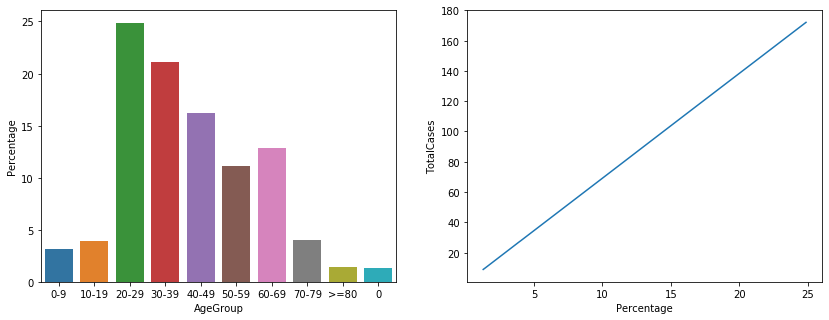

In [6]:

fig, ax =plt.subplots(1,2,figsize=(14,5))




sns.barplot(x=df['AgeGroup'],y=df['Percentage'], ax=ax[0])


sns.lineplot(x=df['Percentage'],y=df['TotalCases'], ax=ax[1])


In [7]:
covid_19_path="../input/covid19-in-india/covid_19_india.csv"
covid_19_df=pd.read_csv(covid_19_path, index_col='Sno')

In [8]:
covid_19_df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
covid_19_df.tail(20)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1949,15/05/20,8:00 AM,Jammu and Kashmir,-,-,485,11,983
1950,15/05/20,8:00 AM,Jharkhand,-,-,87,3,197
1951,15/05/20,8:00 AM,Karnataka,-,-,460,35,987
1952,15/05/20,8:00 AM,Kerala,-,-,491,4,560
1953,15/05/20,8:00 AM,Ladakh,-,-,22,0,43
1954,15/05/20,8:00 AM,Madhya Pradesh,-,-,2171,237,4426
1955,15/05/20,8:00 AM,Maharashtra,-,-,6059,1019,27524
1956,15/05/20,8:00 AM,Manipur,-,-,2,0,3
1957,15/05/20,8:00 AM,Meghalaya,-,-,11,1,13


In [10]:
state_list=covid_19_df['State/UnionTerritory'].tolist()
unique_state=covid_19_df['State/UnionTerritory'].unique().tolist()

In [11]:
sno_conf=list()
for item in unique_state:
    res = len(state_list) - 1 - state_list[::-1].index(item)
    sno_conf.append(res+1)

In [12]:

final_covid19_df=covid_19_df.loc[sno_conf,['State/UnionTerritory','Confirmed']]
    

In [13]:
final_covid19_df.reset_index(inplace=True)


In [14]:
del final_covid19_df['Sno']

In [15]:
final_covid19_df=final_covid19_df.sort_values(by='State/UnionTerritory')
final_covid19_df.set_index('State/UnionTerritory',inplace=True)

In [16]:
final_covid19_df=final_covid19_df.drop(['Unassigned','Nagaland#','Ladakh','Jharkhand#'])
final_covid19_df

,Confirmed
State/UnionTerritory,
Andaman and Nicobar Islands,33
Andhra Pradesh,2205
Arunachal Pradesh,1
Assam,87
Bihar,994
Chandigarh,191
Chhattisgarh,60
Dadar Nagar Haveli,1
Delhi,8470


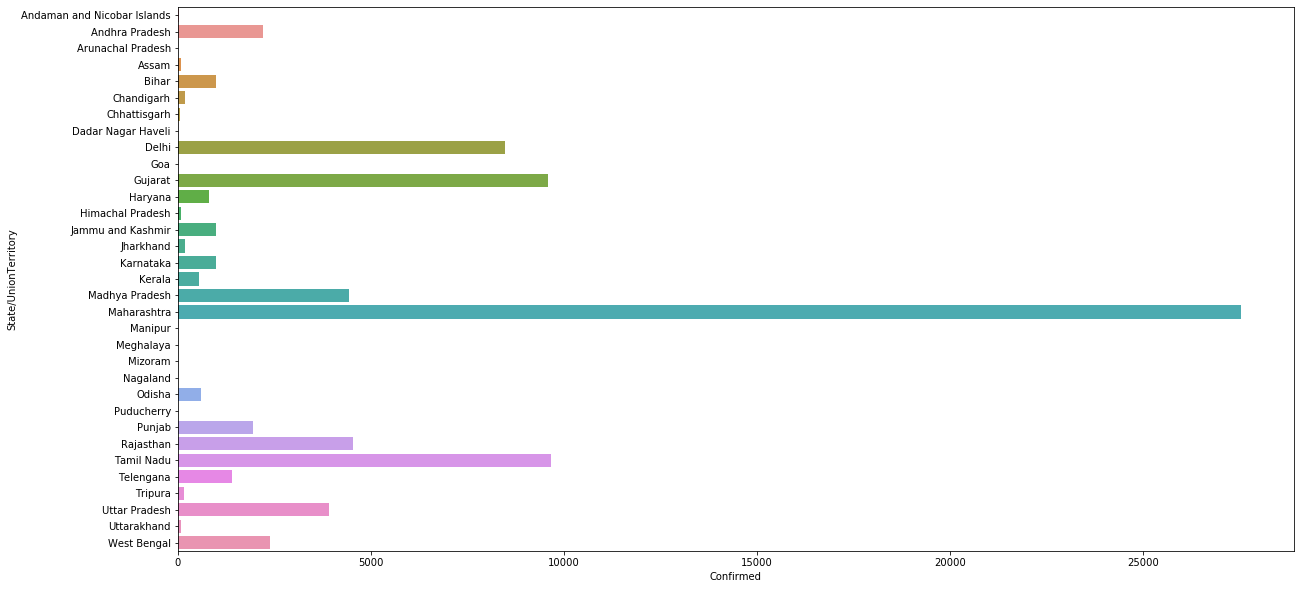

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x=final_covid19_df['Confirmed'], y=final_covid19_df.index)

In [18]:
file_path_hospital="../input/covid19-in-india/HospitalBedsIndia.csv"
hospital_df=pd.read_csv(file_path_hospital, index_col='State/UT')


In [19]:
hospital_df.head(10)

,Sno,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
State/UT,,,,,,,,,,,
Andaman & Nicobar Islands,1,27,4,NaN,3,34,1246,27,575,3,500
Andhra Pradesh,2,1417,198,31.0,20,1666,60799,193,6480,65,16658
Arunachal Pradesh,3,122,62,NaN,15,199,2320,208,2136,10,268
Assam,4,1007,166,14.0,33,1220,19115,1176,10944,50,6198
Bihar,5,2007,63,33.0,43,2146,17796,930,6083,103,5936
Chandigarh,6,40,2,1.0,4,47,3756,0,0,4,778
Chhattisgarh,7,813,166,12.0,32,1023,14354,169,5070,45,4342
Dadra & Nagar Haveli,8,9,2,1.0,1,13,568,10,273,1,316
Daman & Diu,9,4,2,NaN,2,8,298,5,240,0,0


In [20]:
import numpy as np
hospital_df['NumSubDistrictHospitals_HMIS'].replace(np.nan,0,inplace=True)

In [21]:
hospital_df.head()

,Sno,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
State/UT,,,,,,,,,,,
Andaman & Nicobar Islands,1,27,4,0.0,3,34,1246,27,575,3,500
Andhra Pradesh,2,1417,198,31.0,20,1666,60799,193,6480,65,16658
Arunachal Pradesh,3,122,62,0.0,15,199,2320,208,2136,10,268
Assam,4,1007,166,14.0,33,1220,19115,1176,10944,50,6198
Bihar,5,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [22]:
hospital_df.tail()

,Sno,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
State/UT,,,,,,,,,,,
Tripura,33,114,22,12.0,9,157,4895,99,1140,56,3277
Uttar Pradesh,34,3277,671,0.0,174,4122,58310,4442,39104,193,37156
Uttarakhand,35,275,69,19.0,20,383,6660,410,3284,50,5228
West Bengal,36,1374,406,70.0,55,1905,51163,1272,19684,294,58882
All India,37,"29,899",5568,1255.0,1003,37725,739024,19810,279588,3772,431173


In [23]:
hospital_df['Total Beds in State']=hospital_df['NumPublicBeds_HMIS']+hospital_df['NumUrbanBeds_NHP18']
del hospital_df['Sno']

In [24]:

hospital_df.head()


,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total Beds in State
State/UT,,,,,,,,,,,
Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500,1746
Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658,77457
Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268,2588
Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198,25313
Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936,23732


In [25]:
hospital_df=hospital_df.drop(['All India'])

In [26]:
hospital_df.drop(['Sikkim','Lakshadweep','Daman & Diu'],inplace=True)

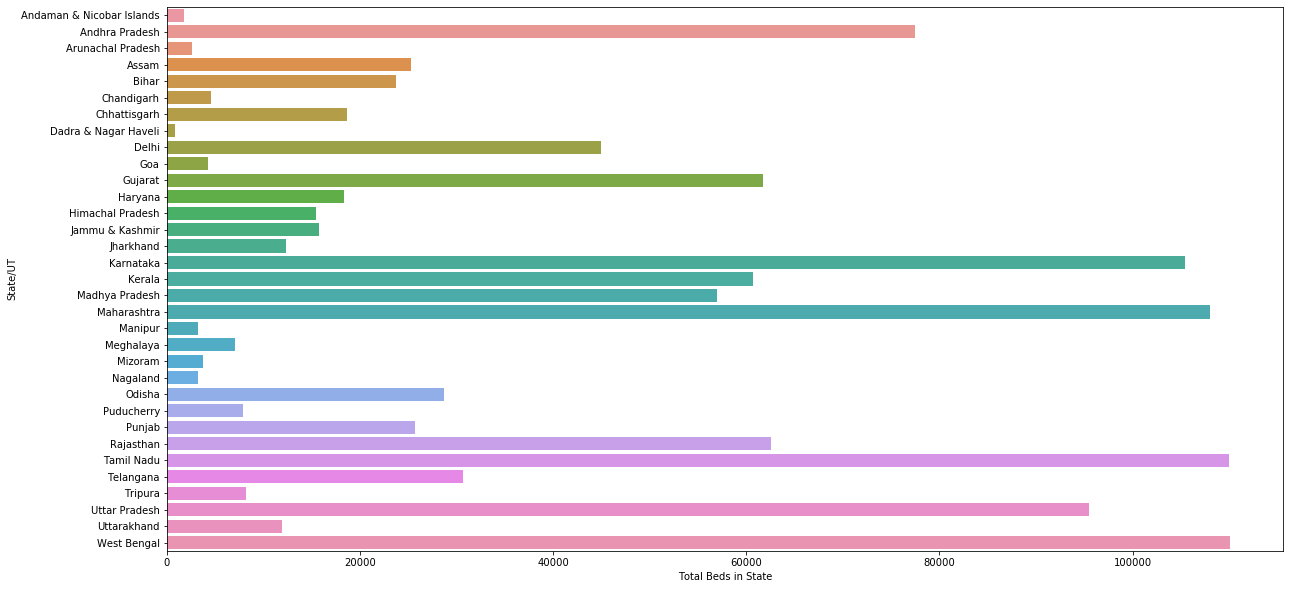

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=hospital_df['Total Beds in State'],y=hospital_df.index)

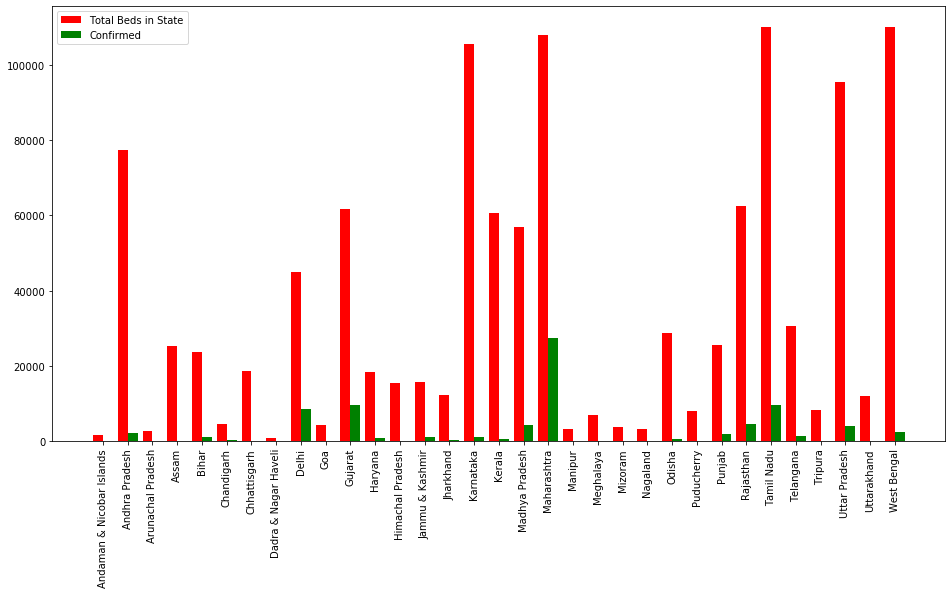

<Figure size 432x288 with 0 Axes>

In [28]:
import numpy as np
ypos=np.arange(len(hospital_df.index))

plt.figure(figsize=(16,8))

plt.bar(ypos-0.2,hospital_df['Total Beds in State'],width=0.4,label='Total Beds in State',color='red')
plt.bar(ypos+0.2,final_covid19_df['Confirmed'],width=0.4,label='Confirmed',color='green')
plt.xticks(ypos,hospital_df.index,rotation=90)



plt.legend()
#show to show the graph
plt.show()
#savefig to save the figure in png with name 'graph'
plt.savefig('graph')


In [29]:
ICMR_Details_path="../input/covid19-in-india/ICMRTestingDetails.csv"
ICMR_Details_df=pd.read_csv(ICMR_Details_path, index_col='DateTime', parse_dates=True)

In [30]:
ICMR_Details_df.head()

,SNo,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
DateTime,,,,
2020-03-13 18:00:00,1,6500.0,5900.0,78.0
2020-03-18 18:00:00,2,13125.0,12235.0,150.0
2020-03-19 18:00:00,3,14175.0,13285.0,182.0
2020-03-20 18:00:00,4,15404.0,14514.0,236.0
2020-03-21 18:00:00,5,16911.0,16021.0,315.0


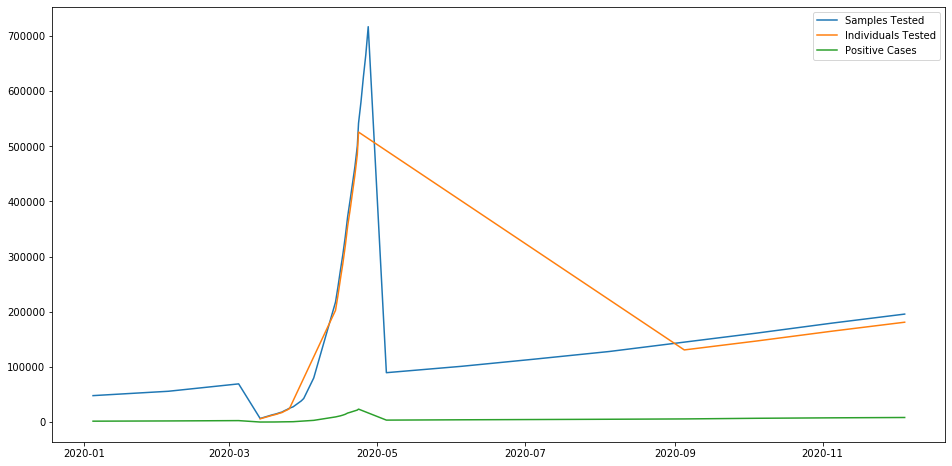

In [31]:
plt.figure(figsize=(16,8))
sns.lineplot(data=ICMR_Details_df['TotalSamplesTested'],label='Samples Tested')
sns.lineplot(data=ICMR_Details_df['TotalIndividualsTested'],label='Individuals Tested')
sns.lineplot(data=ICMR_Details_df['TotalPositiveCases'],label='Positive Cases')


In [32]:
ICMR_Details_df.index

DatetimeIndex(['2020-03-13 18:00:00', '2020-03-18 18:00:00',
               '2020-03-19 18:00:00', '2020-03-20 18:00:00',
               '2020-03-21 18:00:00', '2020-03-22 18:00:00',
               '2020-03-23 20:00:00', '2020-03-24 20:00:00',
               '2020-03-25 20:00:00', '2020-03-26 20:00:00',
               '2020-03-27 09:00:00', '2020-03-28 18:00:00',
               '2020-03-29 18:00:00', '2020-03-30 18:00:00',
               '2020-03-31 18:00:00', '2020-01-04 18:00:00',
               '2020-02-04 21:00:00', '2020-03-04 21:00:00',
               '2020-04-04 21:00:00', '2020-05-04 21:00:00',
               '2020-06-04 21:00:00', '2020-07-04 21:00:00',
               '2020-08-04 21:00:00', '2020-09-04 21:00:00',
               '2020-10-04 21:00:00', '2020-11-04 21:00:00',
               '2020-12-04 21:00:00', '2020-04-13 21:00:00',
               '2020-04-14 21:00:00', '2020-04-15 21:00:00',
               '2020-04-16 21:00:00', '2020-04-17 21:00:00',
               '2020-04-

In [33]:
ICMR_labs_path="../input/covid19-in-india/ICMRTestingLabs.csv"
ICMR_labs_df=pd.read_csv(ICMR_labs_path)

In [34]:
ICMR_labs_df.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [35]:
l1=ICMR_labs_df['state'].value_counts()

In [36]:
d1=pd.DataFrame(l1.index, columns=['State'])
d2=pd.DataFrame(l1.values, columns=['No. of labs'])
state_labs_df=pd.merge(d1,d2, left_index=True, right_index=True)

In [37]:
state_labs_df.sort_values('State', axis=0, ascending=True, inplace=True, na_position ='last')

In [38]:
state_labs_df.reset_index(inplace=True)
del state_labs_df['index']
state_labs_df

,State,No. of labs
0,Andaman and Nicobar Islands,1
1,Andhra Pradesh,7
2,Arunachal Pradesh,1
3,Assam,6
4,Bihar,6
5,Chandigarh,3
6,Chhattisgarh,3
7,Dadra and Nagar Haveli and Daman and Diu,1
8,Delhi,18
9,Goa,1


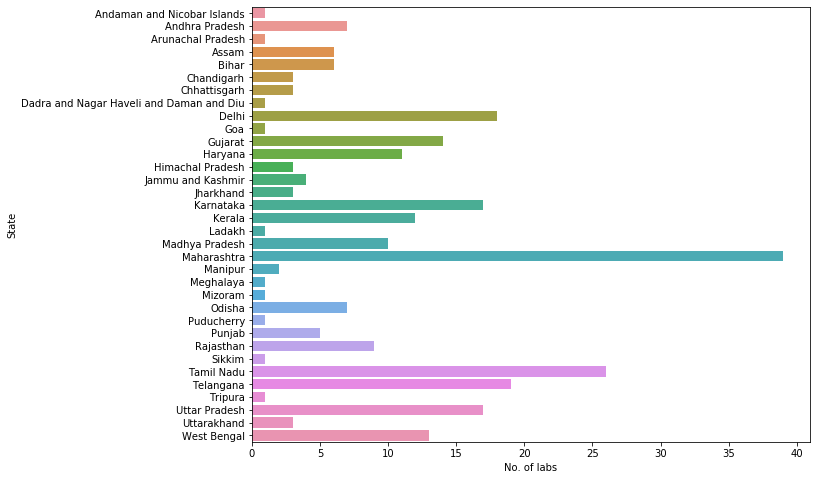

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=state_labs_df['No. of labs'], y=state_labs_df['State'])

In [40]:
statewise_testing_path='../input/covid19-in-india/StatewiseTestingDetails.csv'
statewise_testing_df=pd.read_csv(statewise_testing_path, index_col='State',parse_dates=True)
statewise_testing_df['Date']=pd.to_datetime(statewise_testing_df['Date'])


In [41]:
statewise_testing_df.dtypes

Date            datetime64[ns]
TotalSamples           float64
Negative               float64
Positive               float64
dtype: object

In [42]:
df_mah=statewise_testing_df.loc['Maharashtra']


In [43]:
df_mah.set_index(['Date'],inplace=True)
df_mah

,TotalSamples,Negative,Positive
Date,,,
2020-04-05,16008.0,14837.0,NaN
2020-04-06,17563.0,15808.0,868.0
2020-04-07,20877.0,19290.0,1018.0
2020-04-09,20877.0,19290.0,868.0
2020-04-10,30000.0,28865.0,1135.0
2020-04-11,31841.0,30477.0,1761.0
2020-04-12,35668.0,34094.0,1761.0
2020-04-13,39725.0,37964.0,1996.0
2020-04-14,41071.0,39089.0,2340.0


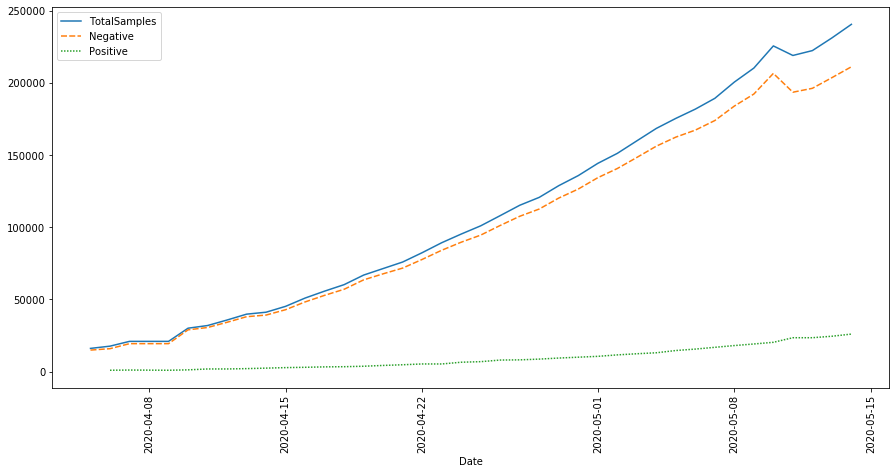

In [44]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.lineplot(data=df_mah)


In [45]:
top10_states_df=final_covid19_df.sort_values(by='Confirmed', ascending=False).head(10)
top10_states_df.index[0]


'Maharashtra'

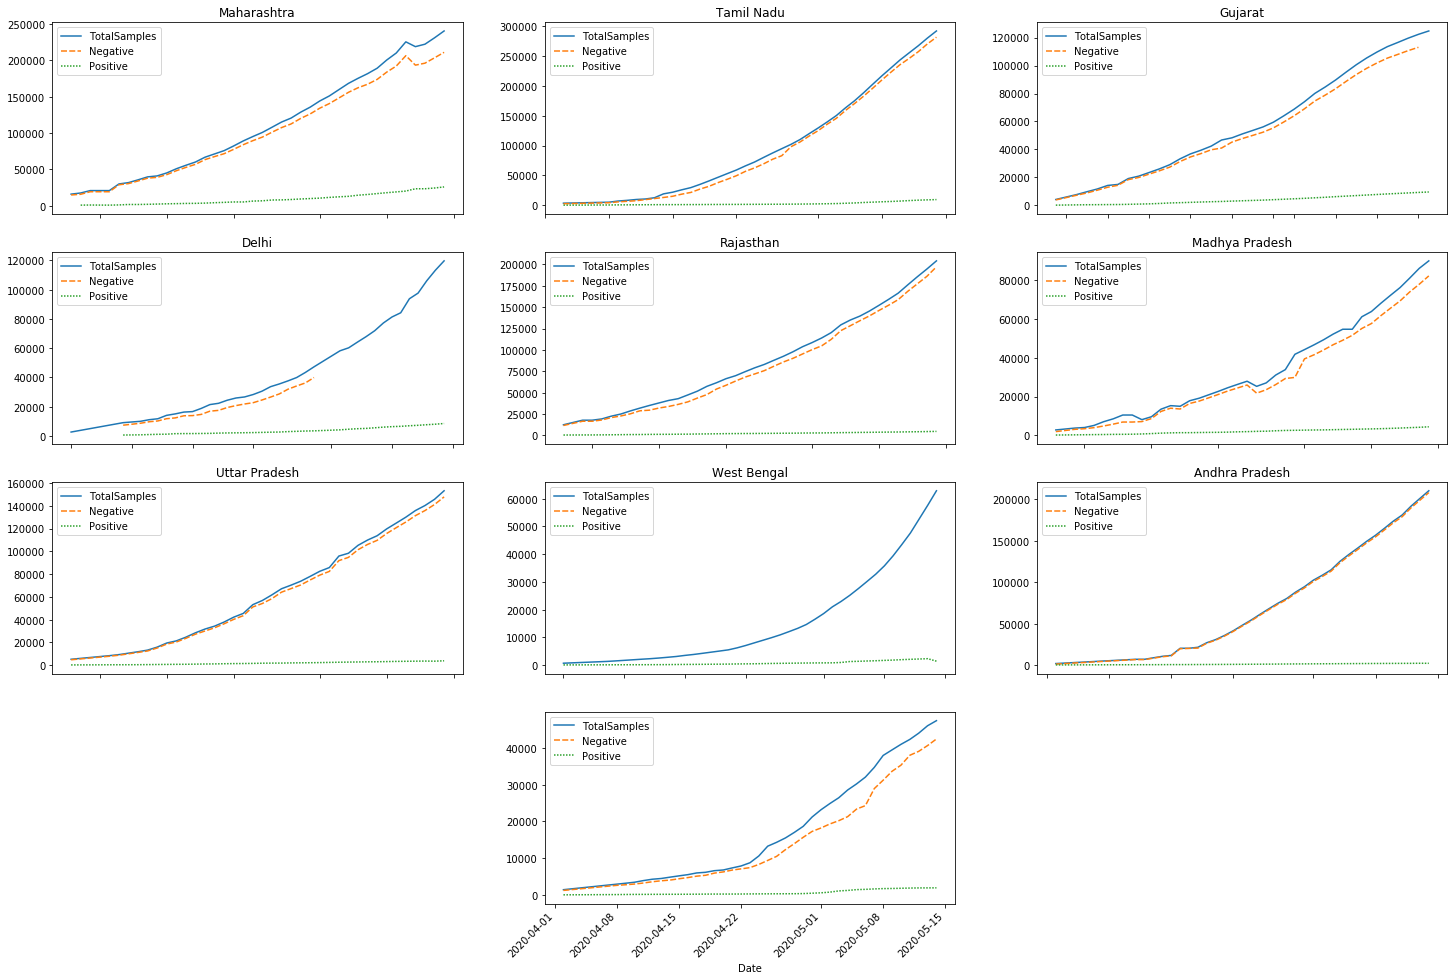

<Figure size 432x288 with 0 Axes>

In [46]:

count=0
fig, ax =plt.subplots(4,3,figsize=(25,18))

plt.figure(0)


g0=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[0]].set_index(['Date']), ax=ax[0,0])
ax[0,0].set_title('MAHARASHTRA')

g1=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[1]].set_index(['Date']), ax=ax[0,1])
g2=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[2]].set_index(['Date']), ax=ax[0,2])
g3=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[3]].set_index(['Date']), ax=ax[1,0])
g4=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[4]].set_index(['Date']), ax=ax[1,1])
g5=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[5]].set_index(['Date']), ax=ax[1,2])
g6=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[6]].set_index(['Date']), ax=ax[2,0])
g7=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[7]].set_index(['Date']), ax=ax[2,1])
g8=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[8]].set_index(['Date']), ax=ax[2,2])
g9=sns.lineplot(data=statewise_testing_df.loc[top10_states_df.index[9]].set_index(['Date']), ax=ax[3,1])

for i in range(4):
    for j in range(3):
        if i==3 and j==0 or i==3 and j==2:
            break
        
        ax[i,j].set_title(top10_states_df.index[count])
        count=count+1

fig.delaxes(ax[3,0])
fig.delaxes(ax[3,2])

fig.autofmt_xdate(rotation=45)


